In [7]:
import pandas as pd
import seaborn as sns

The NFL Data Py package does not offer player stats through their normal service, but the NFLVerse has parquet files we can use directly.

In [2]:
def_df = pd.read_parquet('https://github.com/nflverse/nflverse-data/releases/download/player_stats/player_stats_def_2024.parquet', engine='auto')
def_df.head()

,season,week,season_type,player_id,player_name,player_display_name,position,position_group,headshot_url,team,...,def_pass_defended,def_tds,def_fumbles,def_fumble_recovery_own,def_fumble_recovery_yards_own,def_fumble_recovery_opp,def_fumble_recovery_yards_opp,def_safety,def_penalty,def_penalty_yards
0,2024,1,REG,00-0023853,M.Prater,Matt Prater,K,SPEC,https://static.www.nfl.com/image/upload/f_auto...,ARI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0
1,2024,5,REG,00-0026158,J.Flacco,Joe Flacco,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,JAX,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,2024,1,REG,00-0026190,C.Campbell,Calais Campbell,DE,DL,https://static.www.nfl.com/image/upload/f_auto...,MIA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,2024,2,REG,00-0026190,C.Campbell,Calais Campbell,DE,DL,https://static.www.nfl.com/image/upload/f_auto...,MIA,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,2024,3,REG,00-0026190,C.Campbell,Calais Campbell,DE,DL,https://static.www.nfl.com/image/upload/f_auto...,MIA,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [3]:
def_df.columns

Index(['season', 'week', 'season_type', 'player_id', 'player_name',
       'player_display_name', 'position', 'position_group', 'headshot_url',
       'team', 'def_tackles', 'def_tackles_solo', 'def_tackles_with_assist',
       'def_tackle_assists', 'def_tackles_for_loss',
       'def_tackles_for_loss_yards', 'def_fumbles_forced', 'def_sacks',
       'def_sack_yards', 'def_qb_hits', 'def_interceptions',
       'def_interception_yards', 'def_pass_defended', 'def_tds', 'def_fumbles',
       'def_fumble_recovery_own', 'def_fumble_recovery_yards_own',
       'def_fumble_recovery_opp', 'def_fumble_recovery_yards_opp',
       'def_safety', 'def_penalty', 'def_penalty_yards'],
      dtype='object')

In [4]:
def_df['season_type'].unique() # REGular and POSTseason games

array(['REG', 'POST'], dtype=object)

<Axes: xlabel='def_qb_hits', ylabel='Count'>

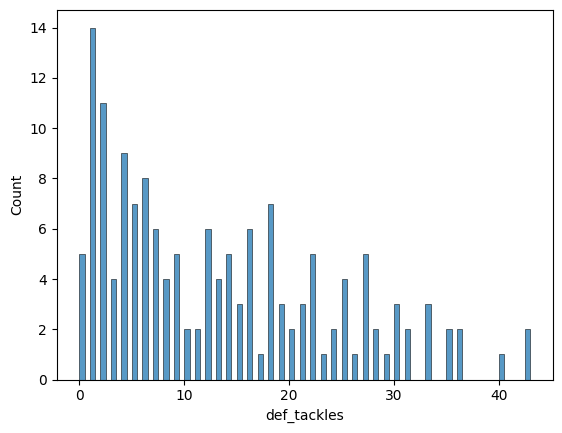

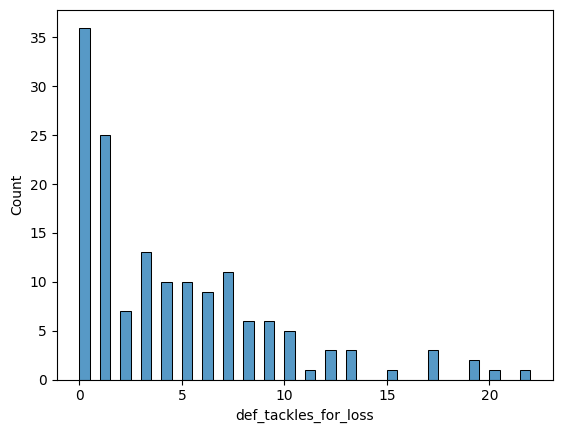

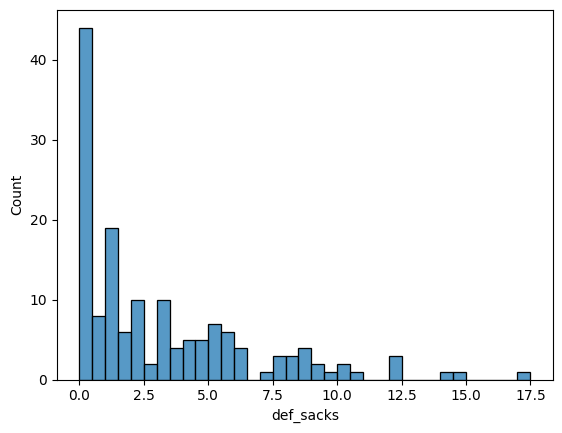

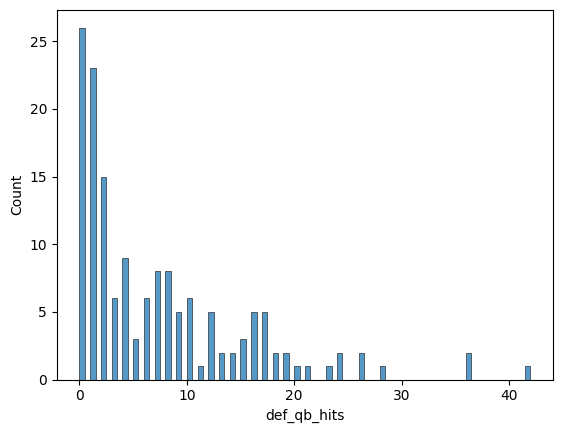

In [ ]:
import matplotlib.pyplot as plt

sacks_df = (
    def_df[def_df["position"] == "DE"]
    .groupby(["player_id", "season"])
    .agg(
        {
            "player_display_name": "max",
            "week": "count",
            "team": "max",
            "def_tackles": "sum",
            "def_tackles_for_loss": "sum",
            "def_tackles_for_loss_yards": "sum",
            "def_sacks": "sum",
            "def_qb_hits": "sum",
        }
    )
)
fig1, tackles_ax = plt.subplots()
fig2, tfl_ax = plt.subplots()
fig3, sacks_ax = plt.subplots()
fig4, qbh_ax = plt.subplots()
sns.histplot(data=sacks_df, x="def_tackles", binwidth=0.5, ax=tackles_ax)
sns.histplot(data=sacks_df, x="def_tackles_for_loss", binwidth=0.5, ax=tfl_ax)
sns.histplot(data=sacks_df, x="def_sacks", binwidth=0.5, ax=sacks_ax)
sns.histplot(data=sacks_df, x="def_qb_hits", binwidth=0.5, ax=qbh_ax)